# DATA DOWNLOADING

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download digit-recognizer


 33% 5.00M/15.3M [00:00<00:00, 32.5MB/s]
100% 15.3M/15.3M [00:00<00:00, 80.6MB/s]


In [6]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Data partition

In [170]:
import pandas as pd
!ls
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
y_train = train['label'] 
X_train = train.drop('label', axis=1)
train.info()

digit-recognizer.zip  sample_data	     test.csv
kaggle.json	      sample_submission.csv  train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [25]:
X_test = test
import tensorflow as tf
from tensorflow.keras import layers

In [177]:
X_train_tensor = tf.constant(X_train)
X_test_tensor = tf.constant(X_test)
y_train_tensor = tf.constant(y_train)

# Data pre visualization

In [179]:
image_width = 28
image_height = 28
X_train_tensor = tf.reshape(X_train_tensor, [-1,image_width , image_height])
# X_train_tensor = tf.expand_dims(X_train_tensor, axis=1)
X_test_tensor = tf.reshape(X_test_tensor, [-1,image_width , image_height])
# X_test_tensor = tf.expand_dims(X_test_tensor, axis=1)
y_train_tensor = tf.Variable(y_train)

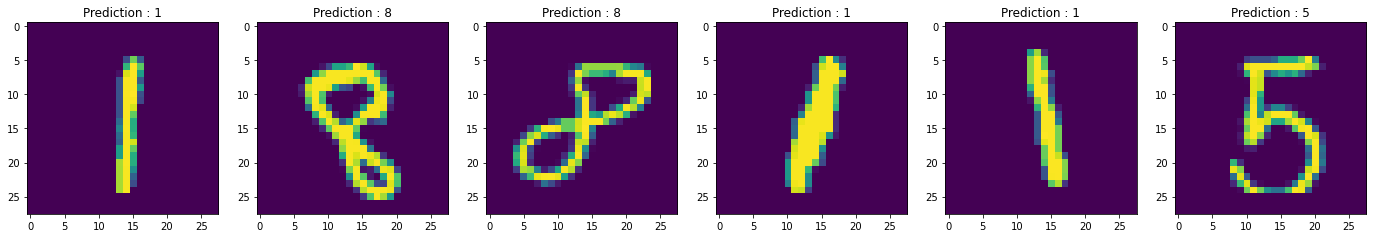

In [180]:
import random
import numpy as np
import matplotlib.pyplot as plt
def visualization(n=3, images=X_train_tensor, labels=y_train_tensor):
  plt.figure(figsize=(n*4,n*4))
  rand_index = []
  for number in range(n): 
    rand_index.append(np.random.randint(0, X_train_tensor.shape[0]))
    plt.subplot(1,n,number+1)
    plt.title(f'Prediction : {labels[rand_index[number]].numpy()}')
    # plt.title(labels[rand_index])
    plt.imshow(images[rand_index[number]])

visualization(6)

In [181]:
X_train = X_train_tensor.numpy()
X_test = X_test_tensor.numpy()
y_train = y_train_tensor.numpy()
X_train.shape, X_test.shape, y_train.shape

((42000, 28, 28), (28000, 28, 28), (42000,))

In [182]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

#Scaling

In [191]:
import tensorflow.keras 
X_train = X_train / 255.
X_test = X_test / 255.

#BaseLine Model

In [192]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,
                           (3,3),
                           activation = 'relu',
                           input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')                      
])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_16 (Flatten)        (None, 5408)              0         
                                                                 
 dense_24 (Dense)            (None, 100)               540900    
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_______________________________________________

In [193]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.9),
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size = 32)

Epoch 1/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.2843 - accuracy: 0.9150
Epoch 2/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0935 - accuracy: 0.9712
Epoch 3/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0572 - accuracy: 0.9826
Epoch 4/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0403 - accuracy: 0.9872
Epoch 5/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0289 - accuracy: 0.9913


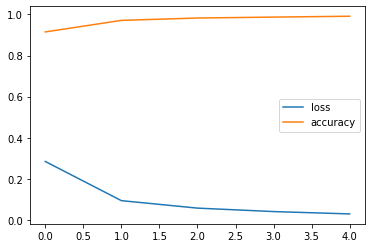

In [203]:
pd.DataFrame(history.history).plot()

# Predicting and Creating submission

In [204]:
y_preds = model.predict(X_test)
train2 = pd.read_csv('train.csv')
test2 = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')
predicciones = []
numbers = [0,1,2,3,4,5,6,7,8,9]
for i in range(X_test.shape[0]):
  predicciones.append(numbers[y_preds[i].argmax()])

# sample_sub['label'] = numbers[y_preds[].argmax()]
submission = pd.DataFrame({'ImageId': sample_sub.ImageId.to_list(),
                           'Label': predicciones})
submission

875/875 [==============================] - 10s 11ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [195]:
PATH_ = 'C:\\Users\Cosas\OneDrive\Escritorio\Data_Science\mnist'
# submission.to_csv(index=False)
from google.colab import files
submission.to_csv('output.csv', index=False) 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>